# Régression linéaire multiple(Prédire les prix des maisons)
- Cette fois-ci, j'essaie d'aider mon ami à prédire le prix d'une maison pour lui.
- Les données sont tirées de kaggle avec une petite modification.
- mon ami veut acheter une maison avec le nombre de chambres à coucher est 3, le nombre de salles de bains est 2, la surface de la maison est 1800sqft, le grade de la maison est 7 et l'année de construction est en 1990.
- on va construire un modèle d'apprentissage automatique pour l'aider !


- Les étapes de travail sont presque les mêmes que celles de la régression linéaire simple, sauf que la régression linéaire multivariée a plus d'une variable indépendante (x).

### Load library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load datasets

Dataset-link: https://drive.google.com/file/d/1SpHGrLUxf2j8fGWFG9d2yQLOEaIBb0-9/view?usp=sharing

In [2]:
#Notre dataframe s'appelle df et contient les données de kc_house_data.csv.
#Les caractéristiques utilisées sont 'bedrooms','bathrooms','sqft_living','grade','price' dan 'yr_built'
df = pd.read_csv('kc_house_data.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])

### Sneak peak data

In [3]:
#1)Visualiser les 5 premières lignes des données
#Variable indépendante (x) : chambres à coucher, salles de bain, superficie habitable, catégorie, année de construction.
#La variable dépendante (y) est le prix.
df. head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


- Explication de chaque colonne :
    1. chambres = Nombre de chambres
    2. salles de bain = Nombre de salles de bain
    3. sqft_living = Surface de la maison en unités de sqft
    4. grade = Système de classement du gouvernement américain du comté de King
    5. yr_built = Année de construction de la maison
    6. price = Prix de la maison (US$)

In [4]:
#Connaître le nombre de colonnes et de rangées de données
# Nos données ont 6 colonnes (caractéristiques) et 21613 lignes.
df.shape

(21613, 6)

In [5]:
#Visualiser les informations sur nos données en commençant par la quantité de données, le type de données, la mémoire utilisée, etc.
#On peut voir que toutes les données sont déjà sous forme numérique.
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


In [6]:
#Visualiser la description statistique des données : moyenne, quartile, écart-type, etc.
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


- Dans la caractéristique salle de bain, il y a une valeur fractionnaire, c'est bizarre s'il y a une valeur fractionnaire de salle de bain. Alors nous changeons d'abord le type de données de float à int.
- Dans la caractéristique chambres à coucher, il y a une valeur de 33, c'est très étrange parce qu'il y'a pas des maisons qui ont 33 chambres, surtout qu'il s'agit d'une maison privée. donc c'est peut-être une faute de frappe et je vais la changer en 3.

In [7]:
#Changer le type de données des salles de bain de float à int.
df['bathrooms'] = df['bathrooms'].astype('int')

In [8]:
#Remplacer la valeur 33 à 3
df['bedrooms'] = df['bedrooms'].replace(33,3)

### Handling Missing Values

In [9]:
#Trouver et gérer les valeurs manquantes
#Il s'avère que nos données n'ont pas de valeurs manquantes.
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

### Exploratory Data Analysis (EDA)

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


C:\Users\tarik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


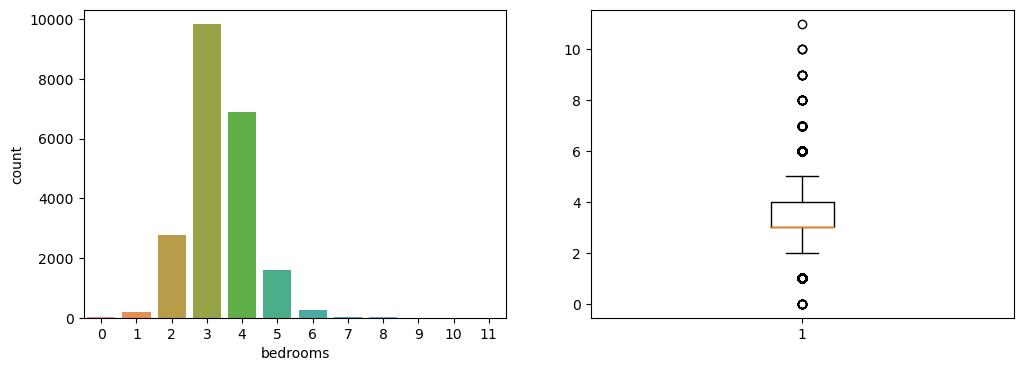

In [11]:
#Analyse univariée des chambres
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bedrooms'])
plt.show()

- On peut voir que la plupart des chambres sont 3 et 4.
- Les données comportent de nombreuses valeurs aberrantes.

C:\Users\tarik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


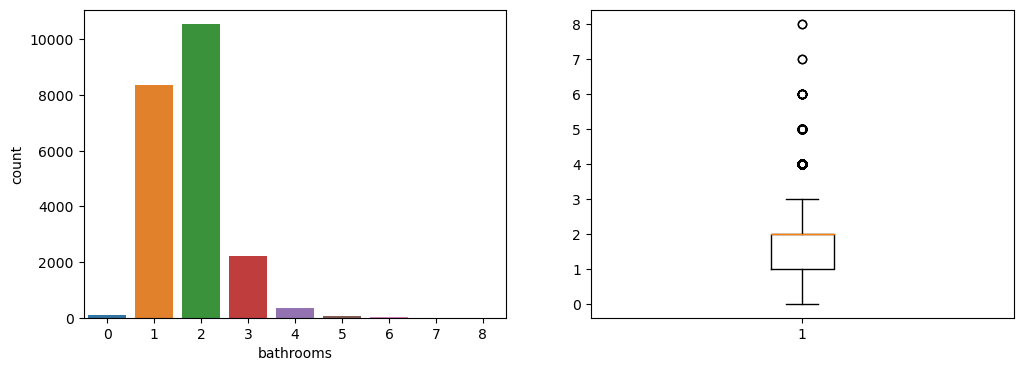

In [12]:
#Analyse univariée salles de bain
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bathrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bathrooms'])
plt.show()

- Le nombre le plus élevé de salles de bain est de 1 et 2.
- Ce qui est intéressant ici, c'est qu'il y a des maisons sans salle de bain ou que le nombre est de 0.
- La valeur aberrante elle-même est assez importante.

C:\Users\tarik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


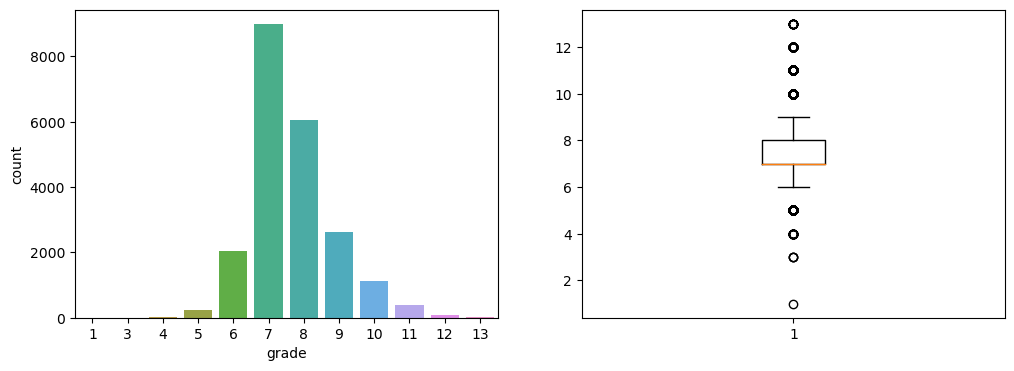

In [13]:
#Univariate analysis grade
#Melihat distribusi dari grade
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['grade'])

f.add_subplot(1,2,2)
plt.boxplot(df['grade'])
plt.show()

- La plupart des foyers du comté de King aux États-Unis ont des classes de 7 et 8.
- A en juger par le boxplot, les données ont quelques aberrations.

C:\Users\tarik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


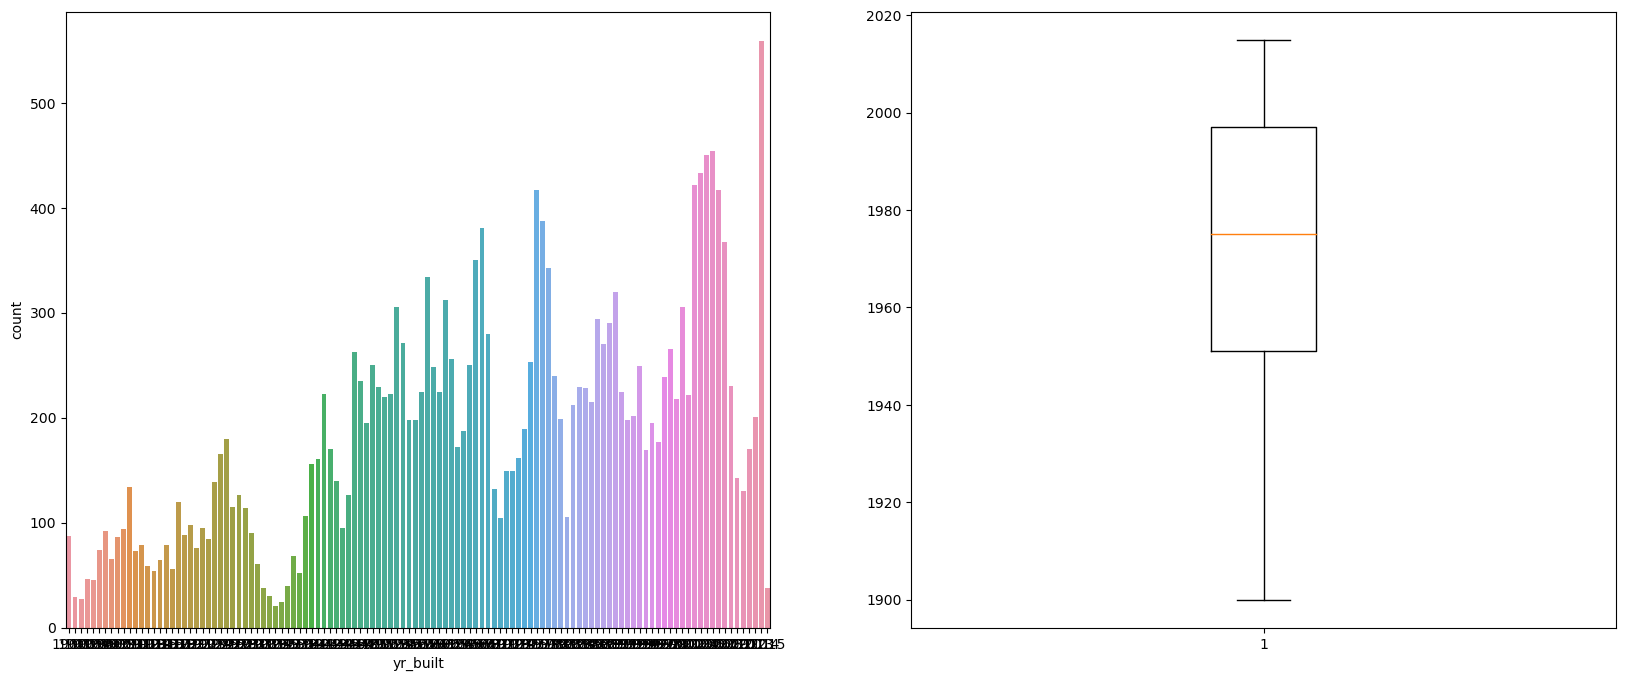

In [14]:
#Analyse univariée yr_built
#Voir la distribution de yr_built
f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
sns.countplot(df['yr_built'])

f.add_subplot(1,2,2)
plt.boxplot(df['yr_built'])
plt.show()

- On peut constater que plus la maison est ancienne, moins les gens vendent leur maison.
- La densité se situe autour des années 1980.
- Les données n'ont pas de valeurs aberrantes.

C:\Users\tarik\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

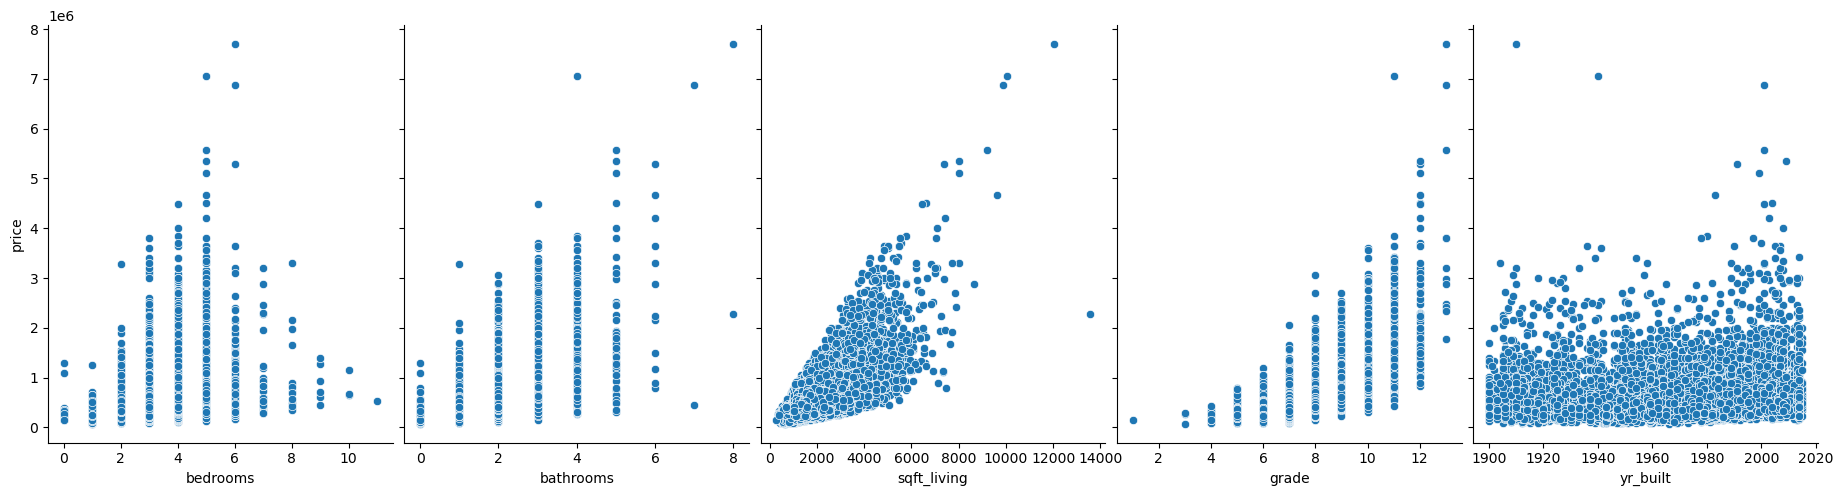

In [15]:
#Analyse bivariée entre la variable indépendante et la variable dépendante

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5, aspect=0.75)
plt.show()

In [16]:
#Connaître la valeur de la corrélation entre la variable indépendante et la variable dépendante
df.corr().style.background_gradient().set_precision(2)

C:\Users\tarik\AppData\Local\Temp\ipykernel_7264\3177504185.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.32,0.51,0.70,0.67,0.05
bedrooms,0.32,1.00,0.48,0.59,0.37,0.16
bathrooms,0.51,0.48,1.00,0.70,0.61,0.43
sqft_living,0.70,0.59,0.70,1.00,0.76,0.32
grade,0.67,0.37,0.61,0.76,1.00,0.45
yr_built,0.05,0.16,0.43,0.32,0.45,1.00


- D'après le tableau de corrélation ci-dessus, on peut voir que sqft_living a une relation linéaire positive très forte avec le prix par rapport aux autres.
- La valeur de corrélation de yr_built est presque proche de zéro, ce qui indique que l'âge de la maison n'affecte pas le prix de la maison.

### Modelling

In [17]:
#Rappeler nos données
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


In [18]:
#D'abord, créer les variables x et y
x = df.drop(columns='price')
y = df['price']

In [19]:
#Deuxièmement, nous avons divisé nos données en formation et en test avec une portion de 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4)

In [20]:
#Vérifier la forme des données d'entraînement et de test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14480, 5)
(14480,)
(7133, 5)
(7133,)


In [21]:
#Troisièmement, nous créons un objet de régression linéaire
lin_reg = LinearRegression()

In [22]:
#Quatrièmement, entraîner le modèle en utilisant les données d'entraînement qui ont été désagrégées.
lin_reg.fit(x,y)

LinearRegression()

In [28]:
#Cinquièmement, trouver la valeur de la pente/du coefficient (m) et de l'ordonnée à l'origine (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-50808.23931255  62844.06397608    186.65461592 132198.84167007
  -3977.52474655]
7040592.804191569


In [27]:
# Nous essayons de le transformer en un cadre de données pour le rendre plus ordonné.
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,bedrooms,-50808.239313
1,bathrooms,62844.063976
2,sqft_living,186.654616
3,grade,132198.841670
4,yr_built,-3977.524747


- à partir des valeurs m et b ci-dessus, si on entre dans la formule, cela devient :
Y = -53061.75x1 + 64658.56x2 + 188.91x3 + 131290.89x4 - 3969.56x5 + 7031568

In [25]:
y_pred = lin_reg.predict(x_test)

In [42]:
#Sixièmement, nous déterminons le score de précision de notre modèle en utilisant les données de test qui ont été déplacées.
lin_reg.score(x_test,y_test)

0.6165318359570355

- Notre modèle obtient un score de précision de 61,13%.

### Prédiction
- Prévisons le prix de la maison selon la demande avec les critères suivants :
    1. Chambres à coucher = 3
    2. salles de bain = 2
    3. Surface habitable = 1800 m².
    4. classe = 7
    5. année de construction = 1990

In [43]:
#Prévision du prix de la maison de rêve 
lin_reg.predict([[3,2,1800,7,1990]])

C:\Users\tarik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([359952.16892938])

Le prix de la maison de rêve de notre ami et de sa femme est d'environ 361351 dollars.

 ****************************************************************************************

# Polynomial Regression

## Introduction

Dans la dernière section, vous avez vu comment vous pouvez tenir compte des interactions entre deux variables en incluant des effets d'interaction dans votre modèle. Dans cette section, vous découvrirez une autre façon d'étendre votre modèle de régression en incluant des termes polynomiaux.

## Objectives

Vous serez en mesure de :

- Comprendre comment tenir compte des relations non linéaires entre les prédicteurs et la variable cible en utilisant des termes polynomiaux.

## Un exemple avec un seul prédicteur

L'ensemble de données "yields.csv", avec seulement 21 cas, contient les mesures des rendements d'une expérience réalisée à six niveaux différents de température en degrés Fahrenheit. Traçons-les.

Dataset-link: https://drive.google.com/file/d/1-F99ZENaX96PnuIGEHo_NnJ8X9zaMfJl/view?usp=sharing

In [37]:
import pandas as pd
yld = pd.read_csv("yield.csv", sep='\s+', index_col = 0)
import matplotlib.pyplot as plt
yld.head()

,Temp,Yield
i,,
1,50,3.3
2,50,2.8
3,50,2.9
4,50,3.2
5,60,2.7


In [38]:
y = yld["Yield"]

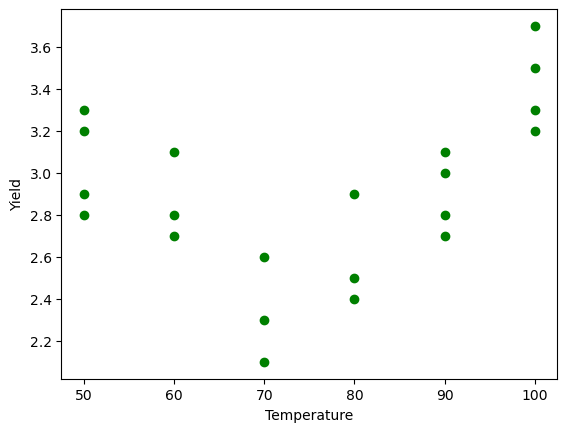

In [39]:
plt.scatter(yld["Temp"],y, color = "green")
plt.xlabel("Temperature")
plt.ylabel("Yield");

Il est clair qu'il n'y a pas de relation linéaire entre le rendement et la température. Essayons tout de même de tracer une ligne et de voir comment notre modèle se comporte :

In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(yld[["Temp"]], y)

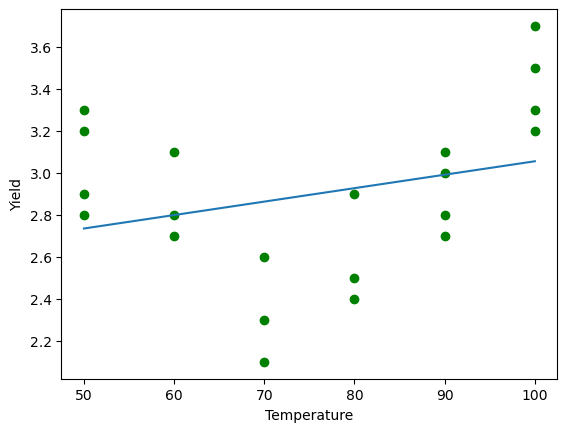

In [41]:
plt.scatter(yld["Temp"], y, color = "green")
plt.plot(yld["Temp"], reg.predict(yld[["Temp"]]))
plt.xlabel("Temperature")
plt.ylabel("Yield");

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

print("mse: ",mean_squared_error(y, reg.predict(yld[["Temp"]])))
print("r2: ",r2_score(y, reg.predict(yld[["Temp"]])))

mse:  0.13926747720364746
r2:  0.08605718085106362


## Construire des modèles polynomiaux

Il est maintenant temps de déterminer le degré optimal des caractéristiques polynomiales pour un modèle adapté à ces données. Pour chacun des deuxième, troisième et quatrième degrés : 

- Instanciez `PolynomialFeatures()` avec le nombre de degrés. 
- Ajustez et transformez les caractéristiques `X_train`. 
- Instanciez et ajustez un modèle de régression linéaire sur les données d'entraînement. 
- Transformez les données de test en caractéristiques polynomiales. 
- Utilisez le modèle que vous avez construit ci-dessus pour faire des prédictions en utilisant les données de test transformées. 
- Évaluez la performance du modèle sur les données de test en utilisant `r2_score()`. 
- Afin de tracer la performance du modèle sur l'ensemble des données, transformez `X` en utilisant `poly`. 
- Utilisez le même modèle (`reg_poly`) pour faire des prédictions en utilisant `X_poly`. 


## Une relation quadratique

Lorsque les relations entre les prédicteurs et les résultats ne sont pas linéaires et présentent une sorte de courbure, les polynômes peuvent être utilisés pour générer de meilleures approximations. L'idée est que vous pouvez transformer votre variable d'entrée, par exemple en l'élevant au carré. Le modèle correspondant serait alors :


$\hat y = \hat \beta_0 + \hat \beta_1x + \hat \beta_2 x^2$ 

L'idée est simple. Vous pouvez mettre au carré votre prédicteur (ici, "Temp") et l'inclure dans votre modèle comme s'il s'agissait d'un nouveau prédicteur.

In [48]:
from sklearn.linear_model import LinearRegression
X = yld[["Temp"]]
X["Temp_sq"] = yld["Temp"]**2

X.head()

,Temp,Temp_sq
i,,
1,50,2500
2,50,2500
3,50,2500
4,50,2500
5,60,3600


In [51]:
#Attendez une minute ! Cet atelier n'est-il pas censé porter sur la régression polynomiale ? Pourquoi importons-nous LinearRegression alors ?
#car la régression polynomiale est un modèle linéaire
reg_q = LinearRegression().fit(X, y)

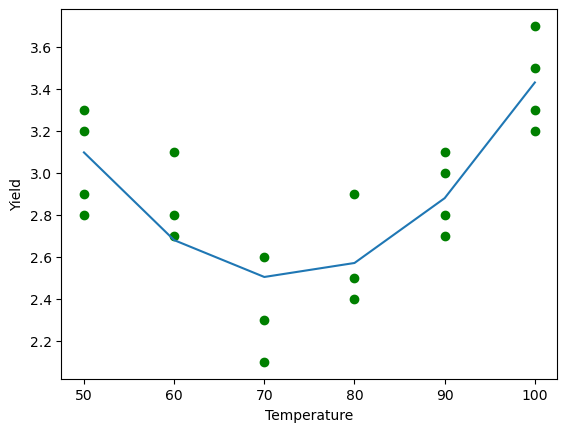

In [52]:
plt.scatter(X["Temp"],y, color = "green")
plt.plot(X["Temp"],reg_q.predict(X))
plt.xlabel("Temperature")
plt.ylabel("Yield");

Voici le graphique résultant. Notez que l'ajustement est bien meilleur, ce qui est confirmé par le score $R^2$ : alors qu'il était de 0,086 auparavant, il est maintenant de 0,6948 !

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y, reg_q.predict(X))
r2_score(y, reg_q.predict(X))

0.6948165884110552

Notez que vous obtenez ici une fonction apparemment "linéaire par morceaux", car les rendements n'ont été mesurés qu'à 50, 60, 70, 80, 90 et 100. En réalité, ce modèle génère une courbe lisse, comme indiqué ci-dessous.

C:\Users\tarik\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sq
- temp
Feature names seen at fit time, yet now missing:
- Temp
- Temp_sq

  warnings.warn(message, FutureWarning)


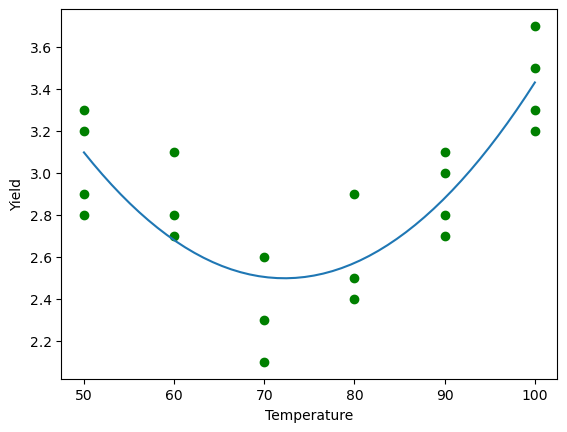

In [56]:
#la creation de nouvelle donnees pour le test
import numpy as np
plt.scatter(X["Temp"],y, color = "green")
#linspace Renvoie des nombres uniformément espacés sur un intervalle spécifié. Renvoie un nombre d'échantillons uniformément espacés, calculés sur l'intervalle [start, stop].
X_pred = pd.DataFrame(np.linspace(50,100,50), columns = ["temp"])
X_pred["sq"] = X_pred**2 
y_pred = reg_q.predict(X_pred)

plt.plot(X_pred["temp"],y_pred)
plt.xlabel("Temperature")
plt.ylabel("Yield");

## Relations d'ordre supérieur

L'utilisation des polynômes ne se limite pas aux relations quadratiques, vous pouvez également explorer les relations cubiques, ... ! Imaginez que vous voulez aller jusqu'à la puissance 10, il serait assez ennuyeux de transformer votre variable 9 fois. Bien sûr, Scikit-Learn a une option polynomiale intégrée dans la bibliothèque `preprocessing` ! Appelons-le avec un polynôme de 5 !

In [62]:
from sklearn.preprocessing import PolynomialFeatures

y = yld["Yield"]
X = yld[["Temp"]]
#PolynomialFeatures déterminent le nombre de degrés.
poly = PolynomialFeatures(6)
#Creating the new features based on X
X_fin = poly.fit_transform(X)
#e fit our model to our data X_fin and the output y
reg_poly = LinearRegression().fit(X_fin,y)
predict_X = reg_poly.predict(X_fin)

In [63]:
#la generation de nouvelles donnees pour le test
X_linspace = pd.DataFrame(np.linspace(50,100,50), columns = ["Temp"])
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

In [64]:
X_linspace=X_linspace["Temp"].tolist()

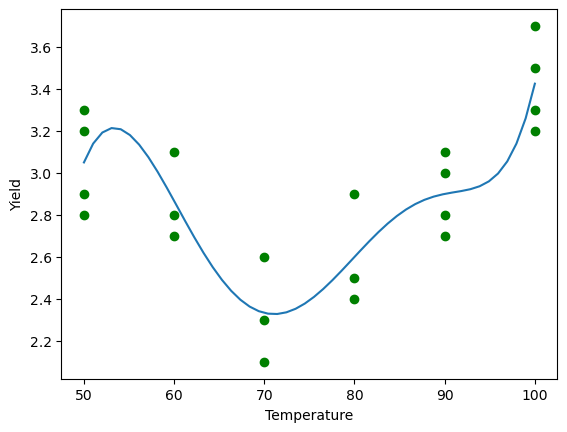

In [70]:
plt.scatter(X["Temp"],y, color = "green")
plt.plot(X_linspace,y_poly_pred)
plt.xlabel("Temperature")
plt.ylabel("Yield");

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
#we want to predict Xfin
mean_squared_error(y, reg_poly.predict(X_fin))
r2_score(y, reg_poly.predict(X_fin))

0.7591145833332826

Cela semble être un ajustement assez régulier ! Ce bon ajustement est également confirmé par un $R^2$ encore meilleur). Notez qu'en ajoutant des polynômes, vous rendez votre modèle plus complexe. Au lieu d'avoir seulement 2 paramètres ($\beta_0$ et $\beta_1$) pour un modèle linéaire, vous en avez maintenant 7 (un pour l'intercept, et 6 pour les termes quand on va jusqu'à un polynôme de degré 6). Nous y reviendrons plus tard !

## Summary

Génial ! Vous savez maintenant comment inclure des polynômes dans votre modèle linéaire. Allons-y et mettons ces connaissances en pratique !